In [22]:
import pandas as pd

#matplotlib 패키지 한글 깨짐 처리 시작
import matplotlib.pyplot as plt
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝

# KB부동산 -> 서울 아파트 매매가격 지수 읽기 ('KB주택매매가격지수' 컬럼)

In [23]:

dfSellIdx = pd.read_csv('../URBAILAB/Data.csv')
dfSellIdx

,기준년도,기준월,지가변동률,KB주택매매가격지수,KB주택전세가격지수,아파트매매실거래가격지수,아파트매매가격지수,아파트전세가격지수,아파트월세통합가격지수,한국은행 기준금리,...,경제심리지수(원계열),경제심리지수(순환변동치),소비자물가지수(총지수),소비자물가지수(주택임차료),소비자물가지수(전세),소비자물가지수(월세),생산자물가지수,수입물가지수,수출물가지수,기대인플레이션
0,2015,6,0.229,57.244,71.024,81.4,76.7,83.6,98.2,1.5,...,91.3,97.7,94.909,95.850,92.304,100.092,100.82,101.51,102.08,2.5
1,2015,7,0.242,57.512,71.576,82.5,77.1,84.2,98.2,1.5,...,95.4,97.3,95.080,96.013,92.591,100.102,100.45,102.06,101.64,2.5
2,2015,8,0.223,57.829,72.110,83.2,77.6,84.8,98.2,1.5,...,97.0,97.0,95.213,96.176,92.886,100.102,99.83,102.69,101.22,2.5
3,2015,9,0.220,58.252,72.807,83.9,78.1,85.7,98.4,1.5,...,96.7,96.6,94.966,96.311,93.117,100.122,99.39,101.88,100.60,2.4
4,2015,10,0.241,58.540,73.234,84.4,78.6,86.5,98.5,1.5,...,97.1,96.2,94.966,96.445,93.349,100.142,98.71,97.99,97.49,2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,2023,10,0.251,90.787,85.442,160.9,94.2,85.5,100.9,3.5,...,92.1,93.2,113.260,103.660,104.480,102.650,121.56,120.34,140.90,4.1
101,2023,11,0.227,90.821,85.976,158.4,94.4,86.1,101.1,3.5,...,91.5,93.1,112.670,103.740,104.550,102.730,121.02,116.16,134.75,4.1
102,2023,12,0.193,90.725,86.378,156.8,94.2,86.6,101.3,3.5,...,91.4,93.0,112.710,103.740,104.470,102.810,121.19,114.95,132.52,3.9
103,2024,1,0.157,90.551,86.767,157.3,94.1,86.8,101.4,3.5,...,91.5,92.9,113.150,103.740,104.420,102.870,121.83,118.51,135.87,3.8


# KB부동산 -> 서울 매수우위지수 읽기

In [24]:
# KB부동산 -> 서울 매수우위지수 읽기
dfSellSuperiorityIdx = pd.read_csv('data/매수우위지수.csv')
dfSellSuperiorityIdx

,Unnamed: 0,기준년도,기준월,지역,KB매수우위지수
0,0,2018,1,서울,118.0
1,1,2018,2,서울,122.8
2,2,2018,3,서울,103.9
3,3,2018,4,서울,79.0
4,4,2018,5,서울,80.0
...,...,...,...,...,...
71,71,2023,12,서울,20.7
72,72,2024,1,서울,26.3
73,73,2024,2,서울,25.6
74,74,2024,3,서울,29.7


In [25]:
dfMerged = pd.merge(left = dfSellIdx, right = dfSellSuperiorityIdx, on = ['기준년도', '기준월'], how = 'inner')
dfMerged

,기준년도,기준월,지가변동률,KB주택매매가격지수,KB주택전세가격지수,아파트매매실거래가격지수,아파트매매가격지수,아파트전세가격지수,아파트월세통합가격지수,한국은행 기준금리,...,소비자물가지수(주택임차료),소비자물가지수(전세),소비자물가지수(월세),생산자물가지수,수입물가지수,수출물가지수,기대인플레이션,Unnamed: 0,지역,KB매수우위지수
0,2018,1,0.417,65.602,78.247,103.0,87.0,92.9,98.2,1.5,...,99.725,99.051,100.482,102.52,101.04,103.37,2.5,0,서울,118.0
1,2018,2,0.417,66.249,78.341,104.8,88.2,93.1,98.3,1.5,...,99.792,99.171,100.472,102.95,102.27,103.84,2.5,1,서울,122.8
2,2018,3,0.440,67.080,78.433,106.1,88.9,93.0,98.2,1.5,...,99.821,99.282,100.422,102.91,100.82,104.39,2.5,2,서울,103.9
3,2018,4,0.302,67.624,78.427,107.4,89.2,92.7,98.1,1.5,...,99.859,99.402,100.382,103.04,101.00,105.53,2.5,3,서울,79.0
4,2018,5,0.360,67.893,78.372,107.9,89.4,92.3,97.9,1.5,...,99.898,99.486,100.352,103.34,102.75,108.64,2.5,4,서울,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,2023,10,0.251,90.787,85.442,160.9,94.2,85.5,100.9,3.5,...,103.660,104.480,102.650,121.56,120.34,140.90,4.1,69,서울,36.9
70,2023,11,0.227,90.821,85.976,158.4,94.4,86.1,101.1,3.5,...,103.740,104.550,102.730,121.02,116.16,134.75,4.1,70,서울,26.1
71,2023,12,0.193,90.725,86.378,156.8,94.2,86.6,101.3,3.5,...,103.740,104.470,102.810,121.19,114.95,132.52,3.9,71,서울,20.7
72,2024,1,0.157,90.551,86.767,157.3,94.1,86.8,101.4,3.5,...,103.740,104.420,102.870,121.83,118.51,135.87,3.8,72,서울,26.3


In [26]:
# 연도-월 컬럼 추가
ymList = list(map(lambda x: '%d-%02d' % (int(dfMerged['기준년도'][x]), int(dfMerged['기준월'][x])), range(len(dfMerged))))
dfMerged['ym'] = pd.DataFrame(ymList)
dfMerged

,기준년도,기준월,지가변동률,KB주택매매가격지수,KB주택전세가격지수,아파트매매실거래가격지수,아파트매매가격지수,아파트전세가격지수,아파트월세통합가격지수,한국은행 기준금리,...,소비자물가지수(전세),소비자물가지수(월세),생산자물가지수,수입물가지수,수출물가지수,기대인플레이션,Unnamed: 0,지역,KB매수우위지수,ym
0,2018,1,0.417,65.602,78.247,103.0,87.0,92.9,98.2,1.5,...,99.051,100.482,102.52,101.04,103.37,2.5,0,서울,118.0,2018-01
1,2018,2,0.417,66.249,78.341,104.8,88.2,93.1,98.3,1.5,...,99.171,100.472,102.95,102.27,103.84,2.5,1,서울,122.8,2018-02
2,2018,3,0.440,67.080,78.433,106.1,88.9,93.0,98.2,1.5,...,99.282,100.422,102.91,100.82,104.39,2.5,2,서울,103.9,2018-03
3,2018,4,0.302,67.624,78.427,107.4,89.2,92.7,98.1,1.5,...,99.402,100.382,103.04,101.00,105.53,2.5,3,서울,79.0,2018-04
4,2018,5,0.360,67.893,78.372,107.9,89.4,92.3,97.9,1.5,...,99.486,100.352,103.34,102.75,108.64,2.5,4,서울,80.0,2018-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,2023,10,0.251,90.787,85.442,160.9,94.2,85.5,100.9,3.5,...,104.480,102.650,121.56,120.34,140.90,4.1,69,서울,36.9,2023-10
70,2023,11,0.227,90.821,85.976,158.4,94.4,86.1,101.1,3.5,...,104.550,102.730,121.02,116.16,134.75,4.1,70,서울,26.1,2023-11
71,2023,12,0.193,90.725,86.378,156.8,94.2,86.6,101.3,3.5,...,104.470,102.810,121.19,114.95,132.52,3.9,71,서울,20.7,2023-12
72,2024,1,0.157,90.551,86.767,157.3,94.1,86.8,101.4,3.5,...,104.420,102.870,121.83,118.51,135.87,3.8,72,서울,26.3,2024-01


# 경제활동인구 읽기

In [27]:
dfNoJob = pd.read_csv('data/temp/실업률.csv')
dfNoJob.head()

,기준년도,기준월,15세이상인구_합계,15세이상인구_남자,15세이상인구_여자,경제활동인구_합계,경제활동인구_남자,경제활동인구_여자,경제활동인구_취업자_합계,경제활동인구_취업자_남자,경제활동인구_취업자_여자,경제활동인구_실업자_합계,경제활동인구_실업자_남자,경제활동인구_실업자_여자,비경제활동인구_합계,비경제활동인구_남자,비경제활동인구_여자
0,2018,1,8540,4085,4456,5341,2956,2385,5105,2830,2275,237,126,110,3199,1129,2070
1,2018,2,8538,4083,4455,5344,2946,2398,5060,2797,2263,284,149,135,3194,1137,2057
2,2018,3,8534,4079,4455,5381,2976,2404,5083,2799,2284,298,178,121,3153,1103,2050
3,2018,4,8533,4078,4454,5363,2952,2412,5098,2806,2291,266,145,120,3169,1127,2043
4,2018,5,8530,4076,4454,5381,2966,2415,5097,2801,2296,285,165,120,3149,1110,2039


In [28]:
dfMerged = pd.merge(left = dfMerged, right = dfNoJob, on = ['기준년도', '기준월'], how = 'inner')
dfMerged

,기준년도,기준월,지가변동률,KB주택매매가격지수,KB주택전세가격지수,아파트매매실거래가격지수,아파트매매가격지수,아파트전세가격지수,아파트월세통합가격지수,한국은행 기준금리,...,경제활동인구_여자,경제활동인구_취업자_합계,경제활동인구_취업자_남자,경제활동인구_취업자_여자,경제활동인구_실업자_합계,경제활동인구_실업자_남자,경제활동인구_실업자_여자,비경제활동인구_합계,비경제활동인구_남자,비경제활동인구_여자
0,2018,1,0.417,65.602,78.247,103.0,87.0,92.9,98.2,1.5,...,2385,5105,2830,2275,237,126,110,3199,1129,2070
1,2018,2,0.417,66.249,78.341,104.8,88.2,93.1,98.3,1.5,...,2398,5060,2797,2263,284,149,135,3194,1137,2057
2,2018,3,0.440,67.080,78.433,106.1,88.9,93.0,98.2,1.5,...,2404,5083,2799,2284,298,178,121,3153,1103,2050
3,2018,4,0.302,67.624,78.427,107.4,89.2,92.7,98.1,1.5,...,2412,5098,2806,2291,266,145,120,3169,1127,2043
4,2018,5,0.360,67.893,78.372,107.9,89.4,92.3,97.9,1.5,...,2415,5097,2801,2296,285,165,120,3149,1110,2039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,2023,10,0.251,90.787,85.442,160.9,94.2,85.5,100.9,3.5,...,2490,5223,2798,2425,134,68,65,3118,1153,1965
70,2023,11,0.227,90.821,85.976,158.4,94.4,86.1,101.1,3.5,...,2493,5230,2809,2421,146,74,72,3099,1136,1963
71,2023,12,0.193,90.725,86.378,156.8,94.2,86.6,101.3,3.5,...,2494,5192,2758,2434,153,92,60,3132,1171,1962
72,2024,1,0.157,90.551,86.767,157.3,94.1,86.8,101.4,3.5,...,2497,5195,2777,2418,169,90,79,3114,1155,1959


# 서울시 가상? 가처분소득 읽기

In [29]:
dfEarnConsume = pd.read_csv('data/서울시_1인당_지역내총생산_지역총소득_개인소득/전처리/전처리_개인소득소비.csv')
dfEarnConsume

,Unnamed: 0,기준년도,1인당 지역내총생산,1인당 지역총소득,1인당 개인소득,1인당 민간소비,가상? 가처분소득
0,0,2018,43664,48362,23323,21314,2009
1,1,2019,45118,48693,23978,21991,1987
2,2,2020,46221,49006,24226,21185,3041
3,3,2021,49680,54571,24950,22603,2347
4,4,2022,51612,57236,26112,24455,1657


In [30]:
dfMerged = pd.merge(left = dfMerged, right = dfEarnConsume, on = ['기준년도'], how = 'left')
dfMerged.head()

,기준년도,기준월,지가변동률,KB주택매매가격지수,KB주택전세가격지수,아파트매매실거래가격지수,아파트매매가격지수,아파트전세가격지수,아파트월세통합가격지수,한국은행 기준금리,...,경제활동인구_실업자_여자,비경제활동인구_합계,비경제활동인구_남자,비경제활동인구_여자,Unnamed: 0_y,1인당 지역내총생산,1인당 지역총소득,1인당 개인소득,1인당 민간소비,가상? 가처분소득
0,2018,1,0.417,65.602,78.247,103.0,87.0,92.9,98.2,1.5,...,110,3199,1129,2070,0.0,43664.0,48362.0,23323.0,21314.0,2009.0
1,2018,2,0.417,66.249,78.341,104.8,88.2,93.1,98.3,1.5,...,135,3194,1137,2057,0.0,43664.0,48362.0,23323.0,21314.0,2009.0
2,2018,3,0.440,67.080,78.433,106.1,88.9,93.0,98.2,1.5,...,121,3153,1103,2050,0.0,43664.0,48362.0,23323.0,21314.0,2009.0
3,2018,4,0.302,67.624,78.427,107.4,89.2,92.7,98.1,1.5,...,120,3169,1127,2043,0.0,43664.0,48362.0,23323.0,21314.0,2009.0
4,2018,5,0.360,67.893,78.372,107.9,89.4,92.3,97.9,1.5,...,120,3149,1110,2039,0.0,43664.0,48362.0,23323.0,21314.0,2009.0


# 서울시 가계부채규모 읽기

In [31]:
dfDebt = pd.read_csv('data/서울시_가계대출규모/전처리/전처리_서울시_가계대출규모.csv')
dfDebt.head()

,Unnamed: 0,예금취급기관,예금은행,비은행예금취급기관,합계,기준년도,기준월,지역
0,0,408773.7,350423.8,58349.9,817547.4,2022,12,서울
1,1,411123.9,352212.1,58911.8,822247.8,2022,11,서울
2,2,412196.5,353154.8,59041.7,824393.0,2022,10,서울
3,3,412258.7,353379.7,58879.0,824517.4,2022,9,서울
4,4,412379.4,353680.2,58699.2,824758.8,2022,8,서울


In [32]:
dfDebt.rename(columns = {'합계':'서울시 가계대출규모 합계'}, inplace = True)
dfDebt.head()

,Unnamed: 0,예금취급기관,예금은행,비은행예금취급기관,서울시 가계대출규모 합계,기준년도,기준월,지역
0,0,408773.7,350423.8,58349.9,817547.4,2022,12,서울
1,1,411123.9,352212.1,58911.8,822247.8,2022,11,서울
2,2,412196.5,353154.8,59041.7,824393.0,2022,10,서울
3,3,412258.7,353379.7,58879.0,824517.4,2022,9,서울
4,4,412379.4,353680.2,58699.2,824758.8,2022,8,서울


In [33]:
dfMerged = pd.merge(left = dfMerged, right = dfDebt, on = ['기준년도', '기준월'], how = 'left')
dfMerged

,기준년도,기준월,지가변동률,KB주택매매가격지수,KB주택전세가격지수,아파트매매실거래가격지수,아파트매매가격지수,아파트전세가격지수,아파트월세통합가격지수,한국은행 기준금리,...,1인당 지역총소득,1인당 개인소득,1인당 민간소비,가상? 가처분소득,Unnamed: 0,예금취급기관,예금은행,비은행예금취급기관,서울시 가계대출규모 합계,지역_y
0,2018,1,0.417,65.602,78.247,103.0,87.0,92.9,98.2,1.5,...,48362.0,23323.0,21314.0,2009.0,59.0,283669.8,239190.4,44479.4,567339.6,서울
1,2018,2,0.417,66.249,78.341,104.8,88.2,93.1,98.3,1.5,...,48362.0,23323.0,21314.0,2009.0,58.0,284094.8,239632.9,44461.9,568189.6,서울
2,2018,3,0.440,67.080,78.433,106.1,88.9,93.0,98.2,1.5,...,48362.0,23323.0,21314.0,2009.0,57.0,285382.6,241036.3,44346.4,570765.3,서울
3,2018,4,0.302,67.624,78.427,107.4,89.2,92.7,98.1,1.5,...,48362.0,23323.0,21314.0,2009.0,56.0,287303.5,242900.6,44402.9,574607.0,서울
4,2018,5,0.360,67.893,78.372,107.9,89.4,92.3,97.9,1.5,...,48362.0,23323.0,21314.0,2009.0,55.0,288940.0,244660.4,44279.6,577880.0,서울
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,2023,10,0.251,90.787,85.442,160.9,94.2,85.5,100.9,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,2023,11,0.227,90.821,85.976,158.4,94.4,86.1,101.1,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,2023,12,0.193,90.725,86.378,156.8,94.2,86.6,101.3,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,2024,1,0.157,90.551,86.767,157.3,94.1,86.8,101.4,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
dfMerged.columns

Index(['기준년도', '기준월', '지가변동률', 'KB주택매매가격지수', 'KB주택전세가격지수', '아파트매매실거래가격지수',
       '아파트매매가격지수', '아파트전세가격지수', '아파트월세통합가격지수', '한국은행 기준금리', '정부대출금리',
       '국민주택채권1종(5년)', '현금통화량', '중앙은행 대 예금취급기관부채', '가계 통화량', '기업 통화량',
       '금융기관 통화량', '기타 통화량', '  주택담보대출-예금취급기관', '    주택담보대출-예금은행',
       '    주택담보대출-비은행예금취급기관', '주택담보대출 - 주택금융공사 및 주택도시기금', '뉴스심리지수',
       '경제심리지수(원계열)', '경제심리지수(순환변동치)', '소비자물가지수(총지수)', '소비자물가지수(주택임차료)',
       '소비자물가지수(전세)', '소비자물가지수(월세)', '생산자물가지수', '수입물가지수', '수출물가지수', '기대인플레이션',
       'Unnamed: 0_x', '지역_x', 'KB매수우위지수', 'ym', '15세이상인구_합계', '15세이상인구_남자',
       '15세이상인구_여자', '경제활동인구_합계', '경제활동인구_남자', '경제활동인구_여자', '경제활동인구_취업자_합계',
       '경제활동인구_취업자_남자', '경제활동인구_취업자_여자', '경제활동인구_실업자_합계', '경제활동인구_실업자_남자',
       '경제활동인구_실업자_여자', '비경제활동인구_합계', '비경제활동인구_남자', '비경제활동인구_여자',
       'Unnamed: 0_y', '1인당 지역내총생산', '1인당 지역총소득', '1인당 개인소득', '1인당 민간소비',
       '가상? 가처분소득', 'Unnamed: 0', '예금취급기관', '예금은행', '비은행예금취급기관',
       '서울시 가계대출규모 합계', '지역_y'],
      dtype='object')

In [36]:
dfMerged = dfMerged.drop(['KB주택매매가격지수', 'KB주택전세가격지수', '아파트매매가격지수', '아파트전세가격지수', '아파트월세통합가격지수',  '정부대출금리',
       '국민주택채권1종(5년)', '중앙은행 대 예금취급기관부채', '기업 통화량', '금융기관 통화량', '기타 통화량', '  주택담보대출-예금취급기관', '    주택담보대출-예금은행',
       '    주택담보대출-비은행예금취급기관', '주택담보대출 - 주택금융공사 및 주택도시기금', '소비자물가지수(주택임차료)', '소비자물가지수(전세)', '소비자물가지수(월세)',  
       'Unnamed: 0_x', '지역_x', '15세이상인구_합계', '15세이상인구_남자', '15세이상인구_여자', '경제활동인구_합계', '경제활동인구_남자', '경제활동인구_여자',
       '경제활동인구_취업자_남자', '경제활동인구_취업자_여자', '경제활동인구_실업자_합계', '경제활동인구_실업자_남자',
       '경제활동인구_실업자_여자', '비경제활동인구_합계', '비경제활동인구_남자', '비경제활동인구_여자',
       'Unnamed: 0_y', '1인당 지역내총생산', '1인당 지역총소득', '1인당 개인소득', '1인당 민간소비',
       'Unnamed: 0', '예금취급기관', '예금은행', '비은행예금취급기관', '지역_y'], axis=1)
dfMerged.head()

,기준년도,기준월,지가변동률,아파트매매실거래가격지수,한국은행 기준금리,현금통화량,가계 통화량,뉴스심리지수,경제심리지수(원계열),경제심리지수(순환변동치),소비자물가지수(총지수),생산자물가지수,수입물가지수,수출물가지수,기대인플레이션,KB매수우위지수,ym,경제활동인구_취업자_합계,가상? 가처분소득,서울시 가계대출규모 합계
0,2018,1,0.417,103.0,1.5,96740.9,1361356.7,113.18,99.7,100.9,98.106,102.52,101.04,103.37,2.5,118.0,2018-01,5105,2009.0,567339.6
1,2018,2,0.417,104.8,1.5,96860.8,1362481.5,105.26,101.2,100.4,98.855,102.95,102.27,103.84,2.5,122.8,2018-02,5060,2009.0,568189.6
2,2018,3,0.440,106.1,1.5,98355.4,1373701.0,103.55,98.1,99.8,98.751,102.91,100.82,104.39,2.5,103.9,2018-03,5083,2009.0,570765.3
3,2018,4,0.302,107.4,1.5,98403.5,1375667.2,105.34,100.1,99.3,98.931,103.04,101.00,105.53,2.5,79.0,2018-04,5098,2009.0,574607.0
4,2018,5,0.360,107.9,1.5,98973.5,1380359.8,105.84,102.1,98.9,98.979,103.34,102.75,108.64,2.5,80.0,2018-05,5097,2009.0,577880.0


In [37]:
dfMerged.columns

Index(['기준년도', '기준월', '지가변동률', '아파트매매실거래가격지수', '한국은행 기준금리', '현금통화량', '가계 통화량',
       '뉴스심리지수', '경제심리지수(원계열)', '경제심리지수(순환변동치)', '소비자물가지수(총지수)', '생산자물가지수',
       '수입물가지수', '수출물가지수', '기대인플레이션', 'KB매수우위지수', 'ym', '경제활동인구_취업자_합계',
       '가상? 가처분소득', '서울시 가계대출규모 합계'],
      dtype='object')

In [38]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
scale_columns = ['지가변동률', '아파트매매실거래가격지수', '한국은행 기준금리', '현금통화량', '가계 통화량',
       '뉴스심리지수', '경제심리지수(원계열)', '경제심리지수(순환변동치)', '소비자물가지수(총지수)', '생산자물가지수',
       '수입물가지수', '수출물가지수', '기대인플레이션', 'KB매수우위지수', '경제활동인구_취업자_합계',
       '가상? 가처분소득', '서울시 가계대출규모 합계']
dfMerged[scale_columns] = min_max_scaler.fit_transform(dfMerged[scale_columns])
dfMerged

,기준년도,기준월,지가변동률,아파트매매실거래가격지수,한국은행 기준금리,현금통화량,가계 통화량,뉴스심리지수,경제심리지수(원계열),경제심리지수(순환변동치),소비자물가지수(총지수),생산자물가지수,수입물가지수,수출물가지수,기대인플레이션,KB매수우위지수,ym,경제활동인구_취업자_합계,가상? 가처분소득,서울시 가계대출규모 합계
0,2018,1,0.651786,0.000000,0.333333,0.000000,0.000000,0.862614,0.794606,0.811940,0.000000,0.029093,0.216123,0.136401,0.228571,0.678423,2018-01,0.629080,0.254335,0.000000
1,2018,2,0.651786,0.020882,0.333333,0.001596,0.001665,0.702128,0.825726,0.797015,0.047817,0.050296,0.246538,0.144069,0.228571,0.711618,2018-02,0.495549,0.254335,0.003302
2,2018,3,0.681122,0.035963,0.333333,0.021496,0.018277,0.667477,0.761411,0.779104,0.041177,0.048323,0.210682,0.153043,0.228571,0.580913,2018-03,0.563798,0.254335,0.013308
3,2018,4,0.505102,0.051044,0.333333,0.022137,0.021188,0.703749,0.802905,0.764179,0.052669,0.054734,0.215134,0.171643,0.228571,0.408714,2018-04,0.608309,0.254335,0.028232
4,2018,5,0.579082,0.056845,0.333333,0.029726,0.028136,0.713880,0.844398,0.752239,0.055733,0.069527,0.258408,0.222385,0.228571,0.415629,2018-05,0.605341,0.254335,0.040946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,2023,10,0.440051,0.671694,1.000000,0.935660,0.946576,0.504357,0.636929,0.582090,0.967441,0.967949,0.693373,0.748736,0.685714,0.117566,2023-10,0.979228,NaN,NaN
70,2023,11,0.409439,0.642691,1.000000,0.953400,0.960451,0.645795,0.624481,0.579104,0.929775,0.941321,0.590010,0.648393,0.685714,0.042877,2023-11,1.000000,NaN,NaN
71,2023,12,0.366071,0.624130,1.000000,0.973941,0.978650,0.666261,0.622407,0.576119,0.932329,0.949704,0.560089,0.612008,0.628571,0.005533,2023-12,0.887240,NaN,NaN
72,2024,1,0.320153,0.629930,1.000000,1.000000,0.981155,0.587639,0.624481,0.573134,0.960419,0.981262,0.648121,0.666667,0.600000,0.044260,2024-01,0.896142,NaN,NaN


# 그래프 그리기

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

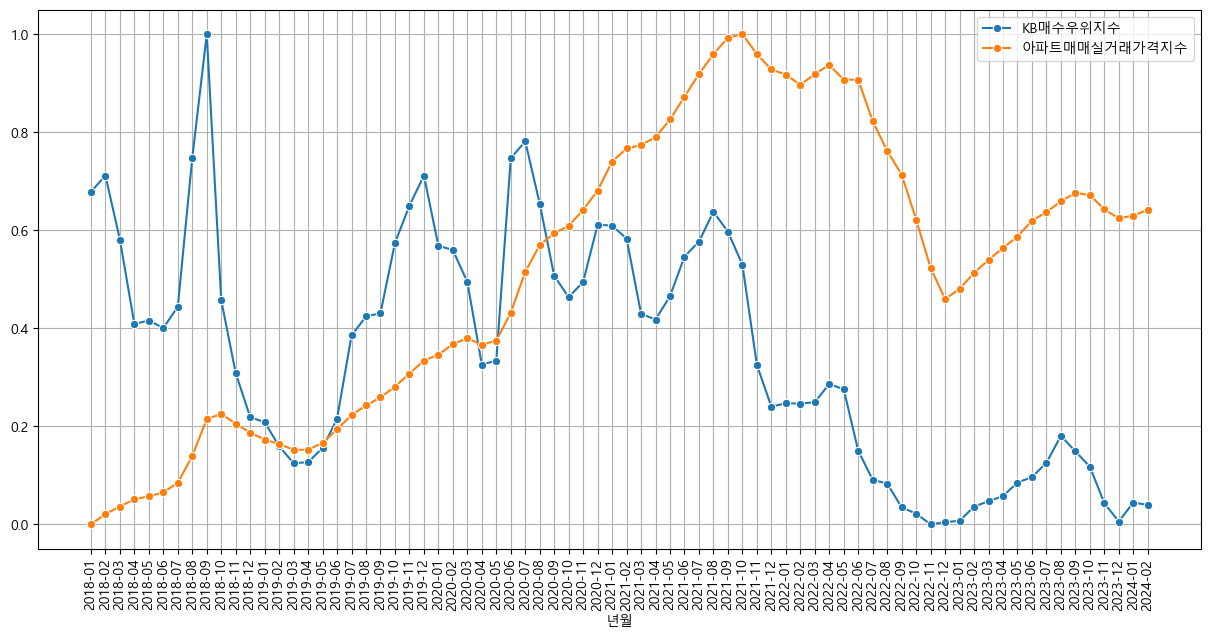

In [40]:
plt.figure(figsize=(15, 7))
sns.lineplot(data = dfMerged, x = 'ym', y = 'KB매수우위지수', label = 'KB매수우위지수', marker = 'o')
sns.lineplot(data = dfMerged, x = 'ym', y = '아파트매매실거래가격지수', label = '아파트매매실거래가격지수', marker = 'o')
plt.xlabel('년월')
plt.xticks(rotation = 90)
plt.ylabel('')
plt.legend()
plt.grid(True)
plt.show()

## KB매수우위지수

본 통계는 표본 공인중개사무소를 대상으로 표본 설문조사로 집계된 통계입니다.

조사항목은 매수자많음, 비슷함, 매도자많음 3개중 택1 입니다.

매수우위지수 = 100 + "매수자 많음" 비중 - "매도자 많음" 비중

매수우위지수가 100을 초과할수록 매수자가 많음을, 100 미만일수록 매도자가 많음을 의미합니다.

pairplot 을 그려서, 매수우위지수와 관계가 있을것 같은 변수를 찾아보자.

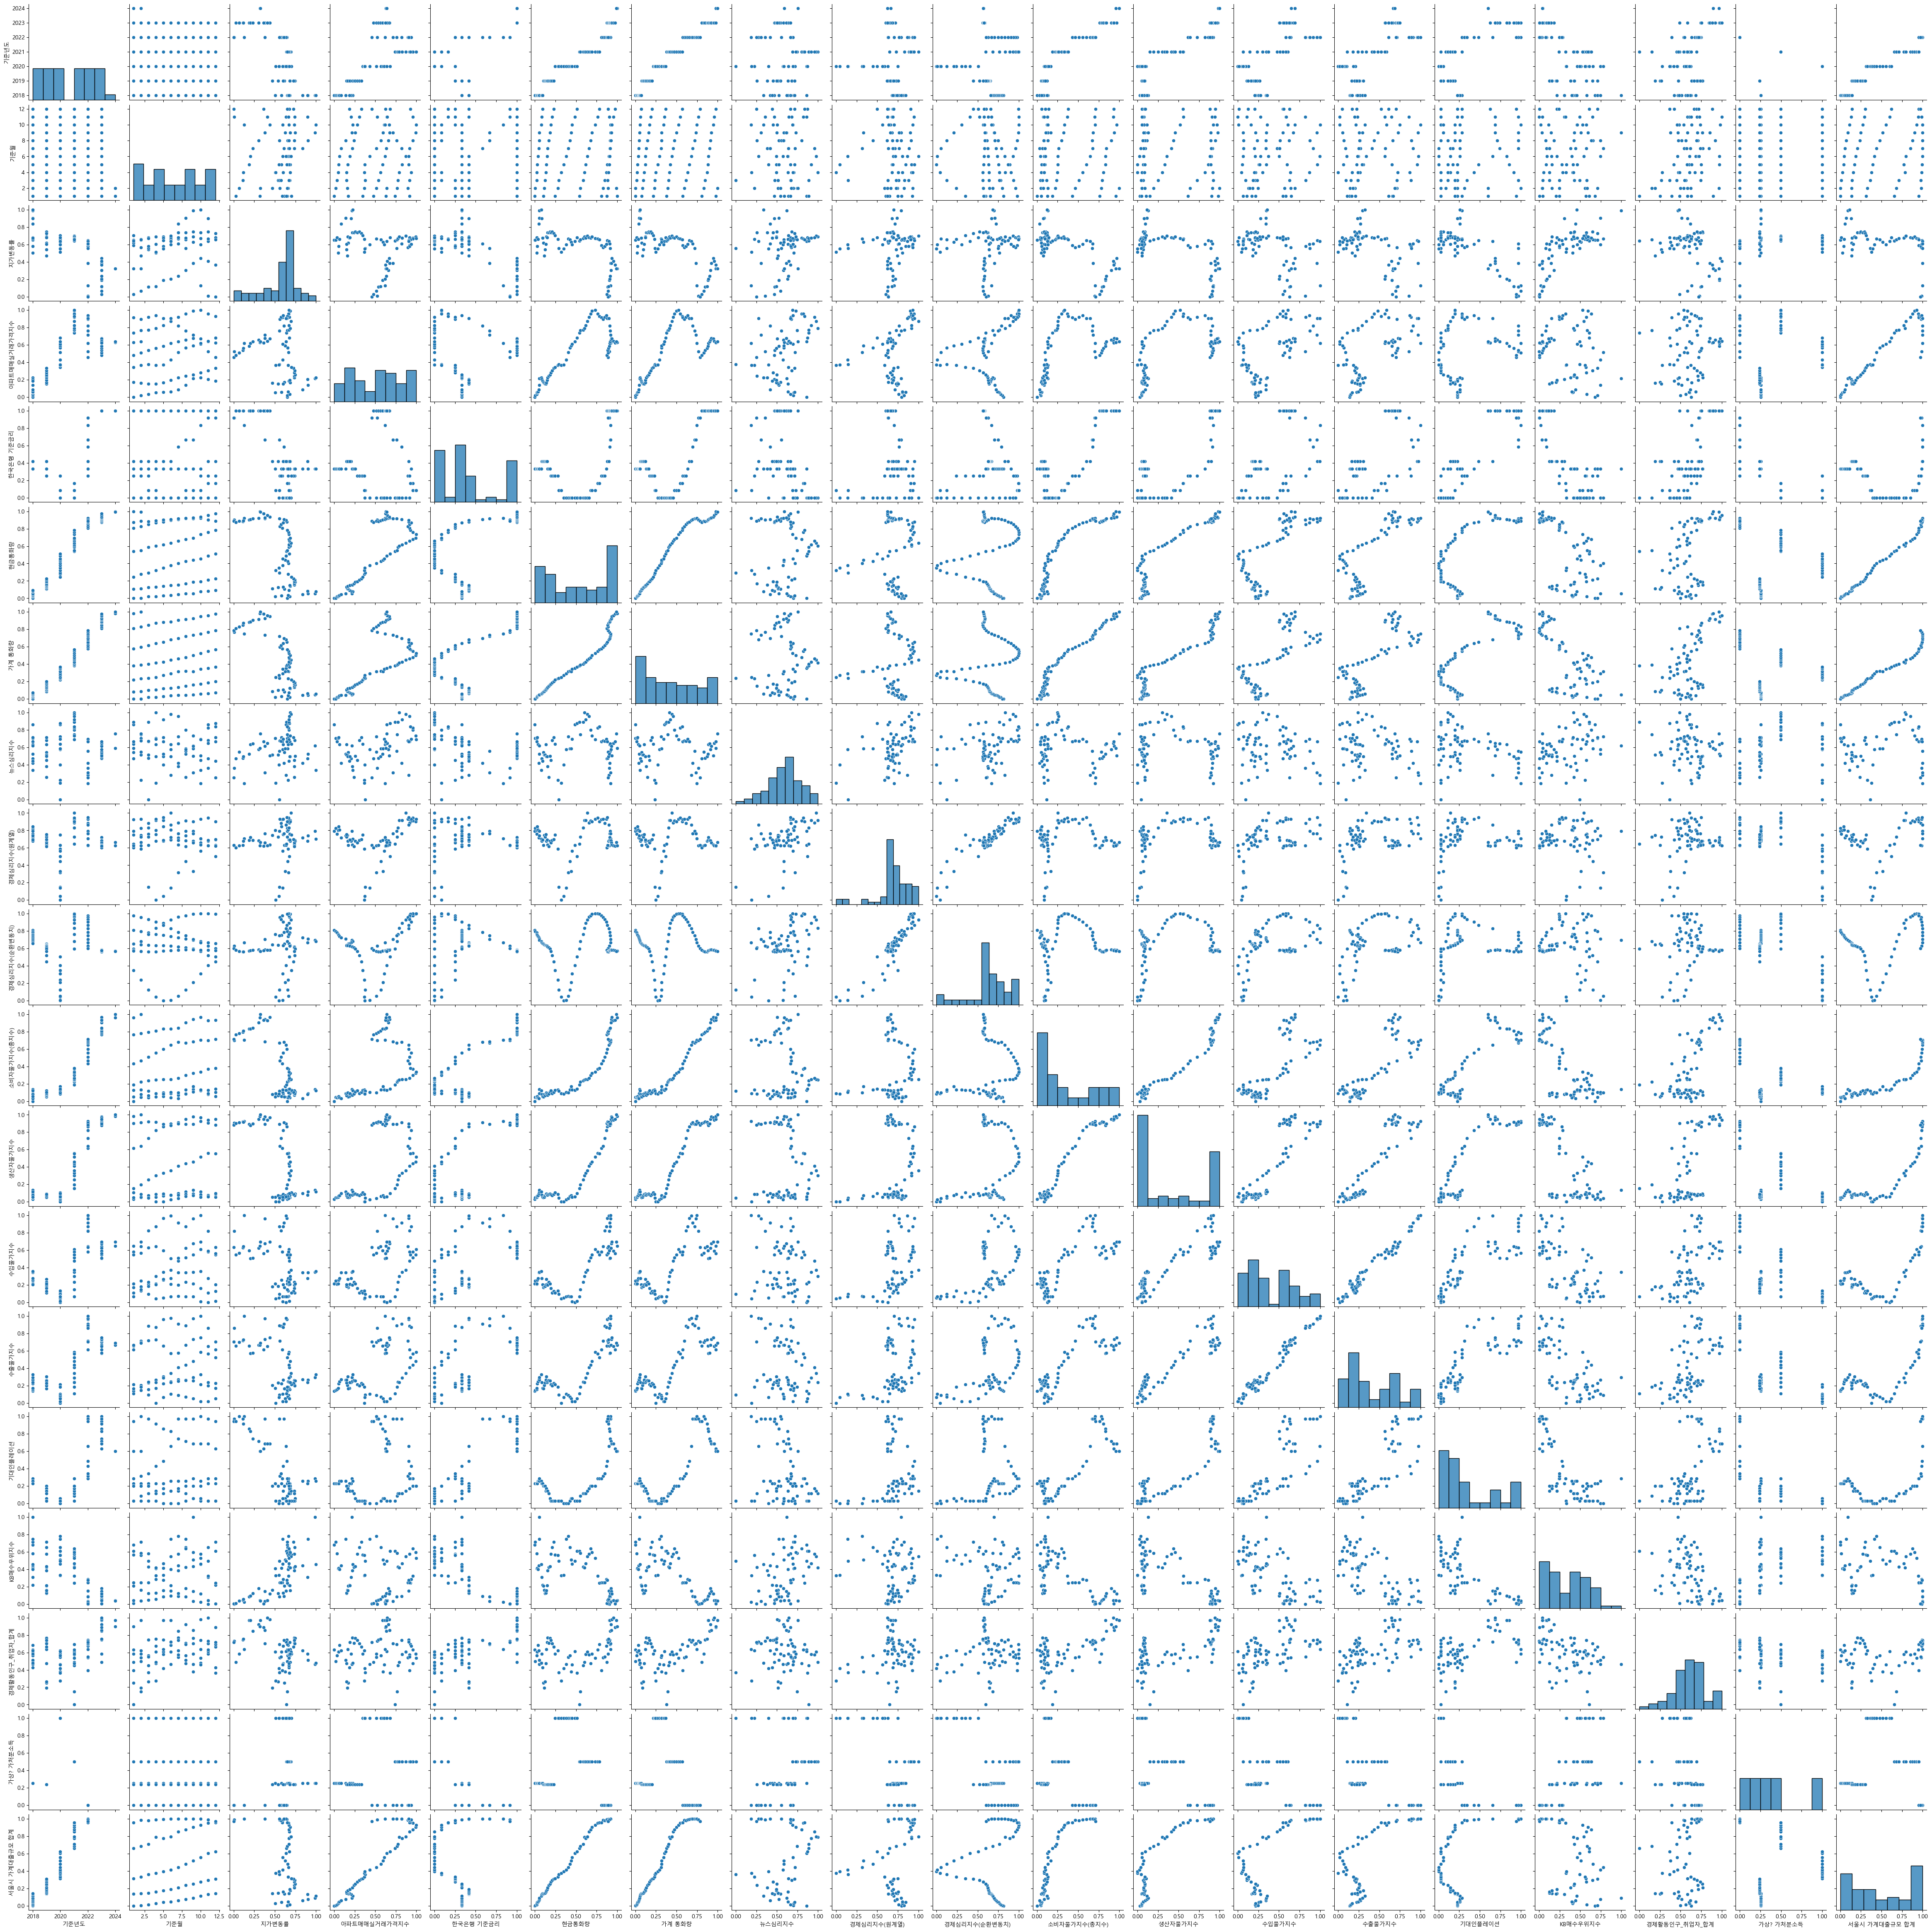

In [41]:
sns.pairplot(data = dfMerged)

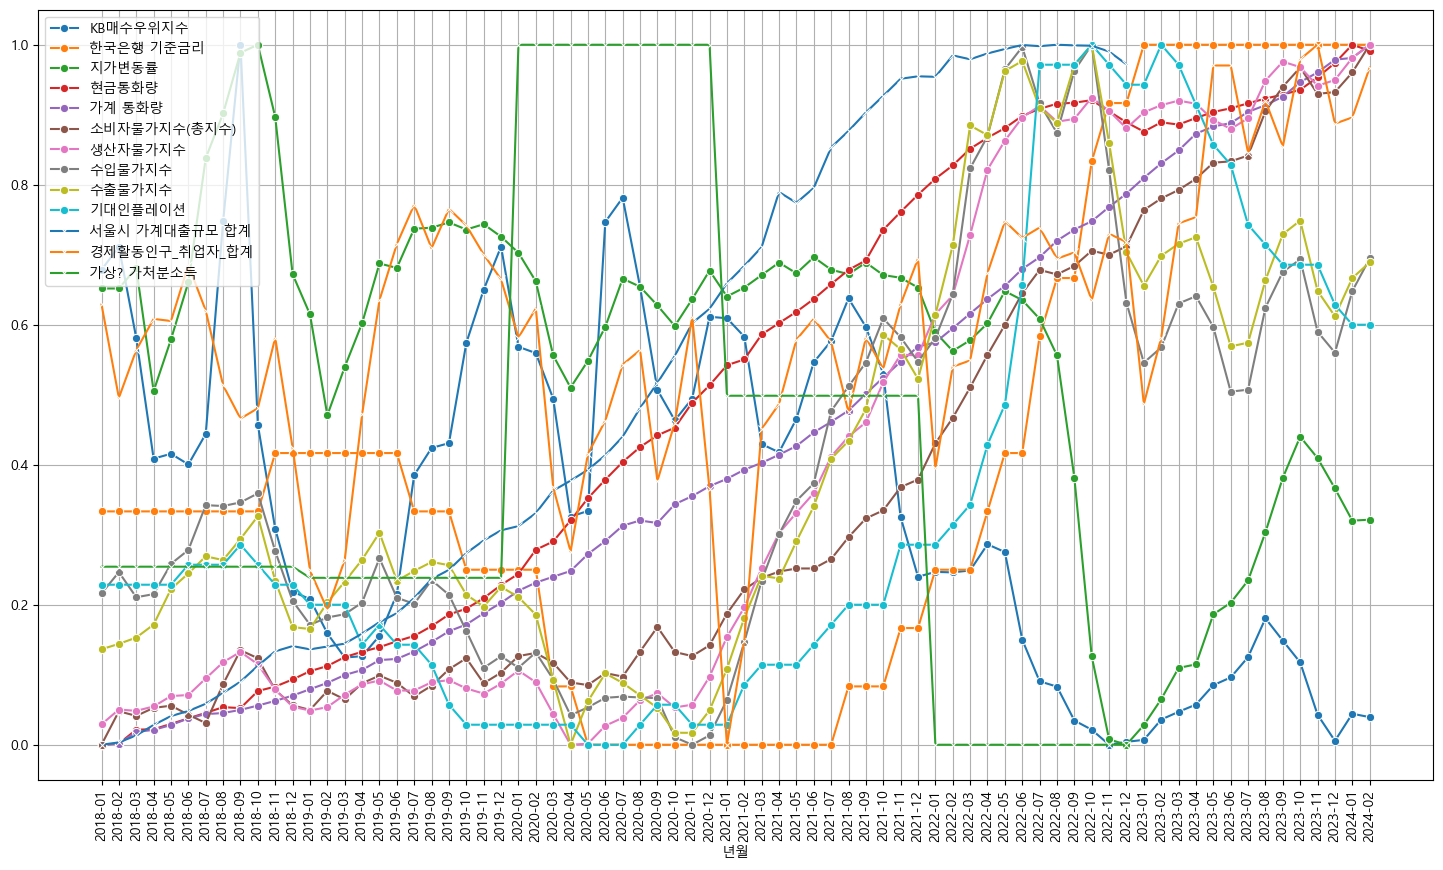

In [42]:
plt.figure(figsize=(18, 10))
sns.lineplot(data = dfMerged, x = 'ym', y = 'KB매수우위지수', label = 'KB매수우위지수', marker = 'o')
sns.lineplot(data = dfMerged, x = 'ym', y = '한국은행 기준금리', label = '한국은행 기준금리', marker = 'o')
sns.lineplot(data = dfMerged, x = 'ym', y = '지가변동률', label = '지가변동률', marker = 'o')
sns.lineplot(data = dfMerged, x = 'ym', y = '현금통화량', label = '현금통화량', marker = 'o')
sns.lineplot(data = dfMerged, x = 'ym', y = '가계 통화량', label = '가계 통화량', marker = 'o')
sns.lineplot(data = dfMerged, x = 'ym', y = '소비자물가지수(총지수)', label = '소비자물가지수(총지수)', marker = 'o')
sns.lineplot(data = dfMerged, x = 'ym', y = '생산자물가지수', label = '생산자물가지수', marker = 'o')
sns.lineplot(data = dfMerged, x = 'ym', y = '수입물가지수', label = '수입물가지수', marker = 'o')
sns.lineplot(data = dfMerged, x = 'ym', y = '수출물가지수', label = '수출물가지수', marker = 'o')
sns.lineplot(data = dfMerged, x = 'ym', y = '기대인플레이션', label = '기대인플레이션', marker = 'o')
sns.lineplot(data = dfMerged, x = 'ym', y = '서울시 가계대출규모 합계', label = '서울시 가계대출규모 합계', marker = 'x')
sns.lineplot(data = dfMerged, x = 'ym', y = '경제활동인구_취업자_합계', label = '경제활동인구_취업자_합계', marker = 'x')
sns.lineplot(data = dfMerged, x = 'ym', y = '가상? 가처분소득', label = '가상? 가처분소득', marker = 'x')
plt.xlabel('년월')
plt.xticks(rotation = 90)
plt.ylabel('')
plt.legend()
plt.grid(True)
plt.show()

KB매수우위지수에 영향을 주는것으로 생각되는 변수는..

- 기준금리 (반비례)

- 지가변동률 (정비례)

- 기대인플레이션 (반비례)

- 가계부채 (반비례)

- 가상? 가처분소득 (정비례)

여기엔 안나왔지만 정부 정책도 분명히 영향을 줄것임.

TODO [ ] 매수우위지수가 뾰족한 부분의 정부 정책을 살펴보면 좋을듯.

위 4개만 다시 그려보면..


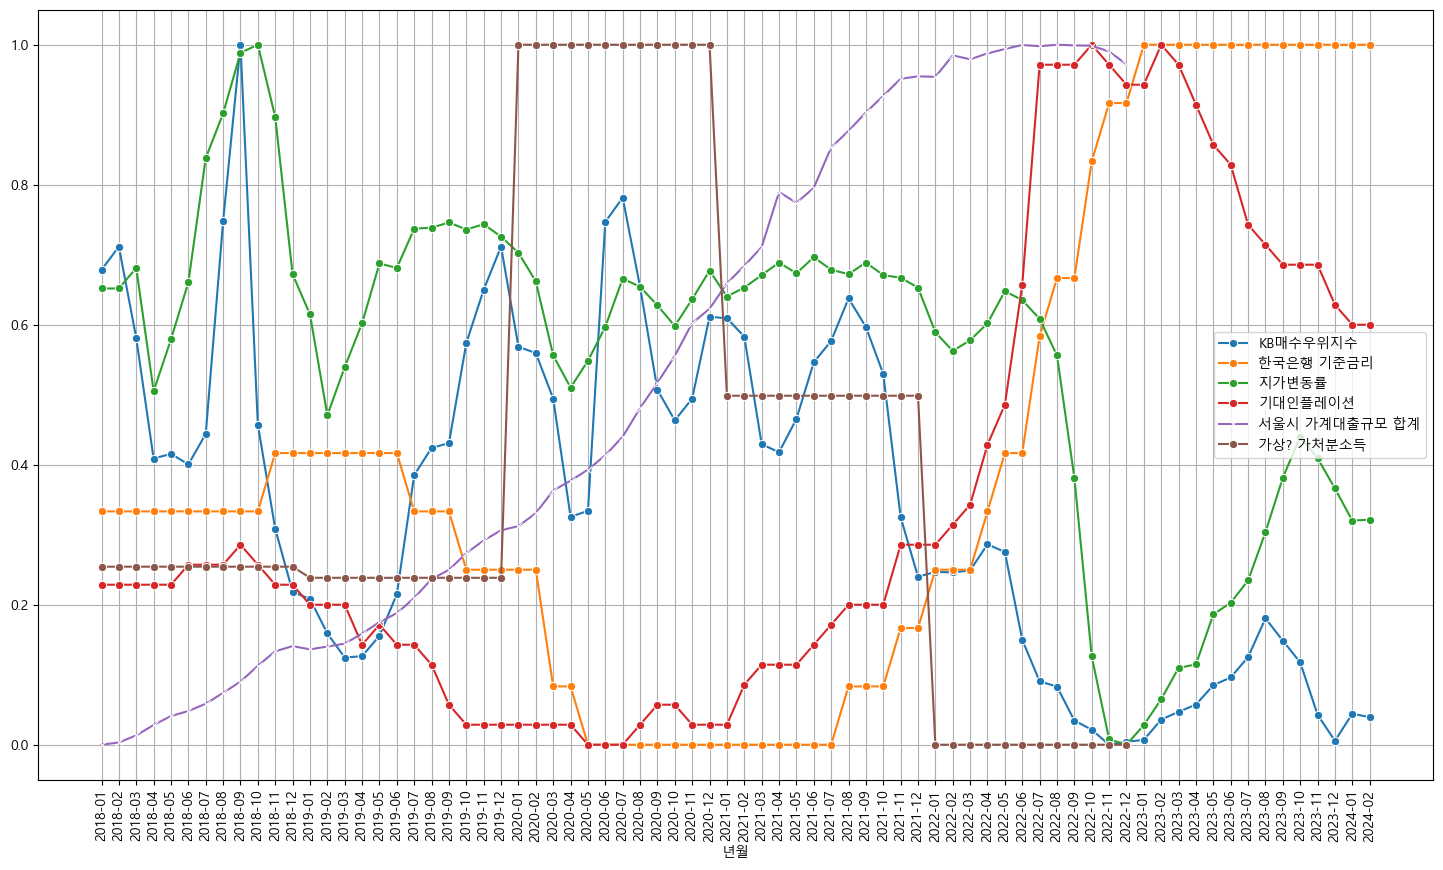

In [45]:
plt.figure(figsize=(18, 10))
sns.lineplot(data = dfMerged, x = 'ym', y = 'KB매수우위지수', label = 'KB매수우위지수', marker = 'o')
sns.lineplot(data = dfMerged, x = 'ym', y = '한국은행 기준금리', label = '한국은행 기준금리', marker = 'o')
sns.lineplot(data = dfMerged, x = 'ym', y = '지가변동률', label = '지가변동률', marker = 'o')
sns.lineplot(data = dfMerged, x = 'ym', y = '기대인플레이션', label = '기대인플레이션', marker = 'o')
sns.lineplot(data = dfMerged, x = 'ym', y = '서울시 가계대출규모 합계', label = '서울시 가계대출규모 합계', marker = 'x')
sns.lineplot(data = dfMerged, x = 'ym', y = '가상? 가처분소득', label = '가상? 가처분소득', marker = 'o')
plt.xlabel('년월')
plt.xticks(rotation = 90)
plt.ylabel('')
plt.legend()
plt.grid(True)
plt.show()

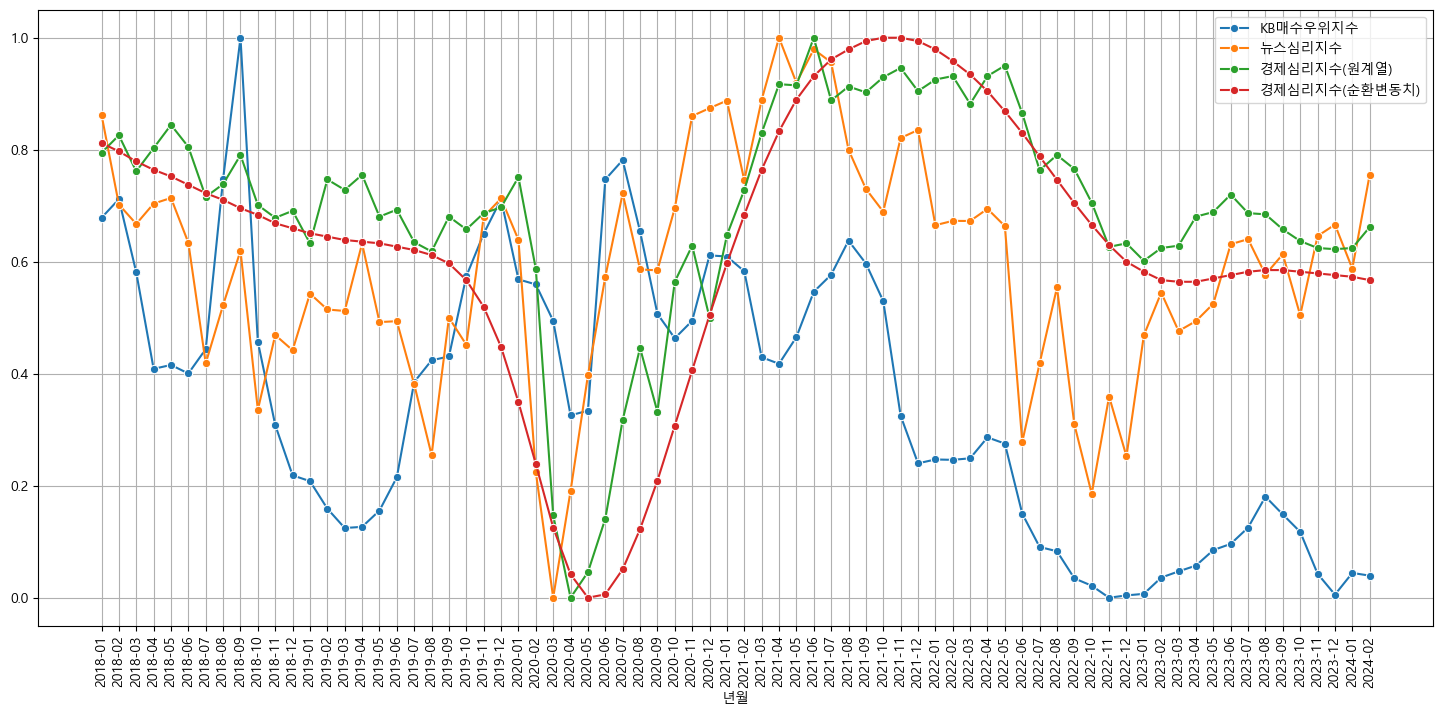

In [46]:
plt.figure(figsize=(18, 8))
sns.lineplot(data = dfMerged, x = 'ym', y = 'KB매수우위지수', label = 'KB매수우위지수', marker = 'o')
sns.lineplot(data = dfMerged, x = 'ym', y = '뉴스심리지수', label = '뉴스심리지수', marker = 'o')
sns.lineplot(data = dfMerged, x = 'ym', y = '경제심리지수(원계열)', label = '경제심리지수(원계열)', marker = 'o')
sns.lineplot(data = dfMerged, x = 'ym', y = '경제심리지수(순환변동치)', label = '경제심리지수(순환변동치)', marker = 'o')
plt.xlabel('년월')
plt.xticks(rotation = 90)
plt.ylabel('')
plt.legend()
plt.grid(True)
plt.show()

매수우위지수와 뉴스심리지수, 경제심리지수는 관계가 있어보이는 구간도 있고 아닌 구간도 있음.

2019-10 ~ 2021-02 기간 동안은 거의 일치해보임.